In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('data1.csv')
data.head()

,headline_text,senti_label
0,act fire witnesses must be aware of defamation,0
1,air nz staff in aust strike for pay rise,0
2,air nz strike to affect australian travellers,0
3,ambitious olsson wins triple jump,1
4,antic delighted with record breaking barca,1


In [3]:
data['senti_label'].value_counts(normalize=True)

senti_label
0    0.61148
1    0.38852
Name: proportion, dtype: float64

In [4]:
import re
# Stop words Removal
import nltk
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import contractions

In [5]:
#cleaner function    
def headline_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [6]:
cleaned_headline = []  # list of cleaned tweets
for headline in data['headline_text']:
    cleaned_headline.append(headline_cleaner_without_stopwords(headline))

In [7]:
cleaned_headline[:5]

['act fire witness must be aware of defamation ',
 'air nz staff in aust strike for pay rise ',
 'air nz strike to affect australian traveller ',
 'ambitious olsson win triple jump ',
 'antic delighted with record breaking barca ']

In [8]:
data['cleaned_headline_w/o_SW'] = cleaned_headline
data.head()

,headline_text,senti_label,cleaned_headline_w/o_SW
0,act fire witnesses must be aware of defamation,0,act fire witness must be aware of defamation
1,air nz staff in aust strike for pay rise,0,air nz staff in aust strike for pay rise
2,air nz strike to affect australian travellers,0,air nz strike to affect australian traveller
3,ambitious olsson wins triple jump,1,ambitious olsson win triple jump
4,antic delighted with record breaking barca,1,antic delighted with record breaking barca


In [9]:
#plot 25 most common words
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['headline_text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list


['act', 'fire', 'witnesses', 'must', 'be', 'aware', 'of', 'defamation', 'air', 'nz', 'staff', 'in', 'aust', 'strike', 'for', 'pay', 'rise', 'air', 'nz', 'strike', 'to', 'affect', 'australian', 'travellers', 'ambitious', 'olsson', 'wins', 'triple', 'jump', 'antic', 'delighted', 'with', 'record', 'breaking', 'barca', 'aust', 'addresses', 'un', 'security', 'council', 'over', 'iraq', 'australia', 'is', 'locked', 'into', 'war', 'timetable', 'opp', 'barca']


20246

In [10]:
import matplotlib.pyplot as plt

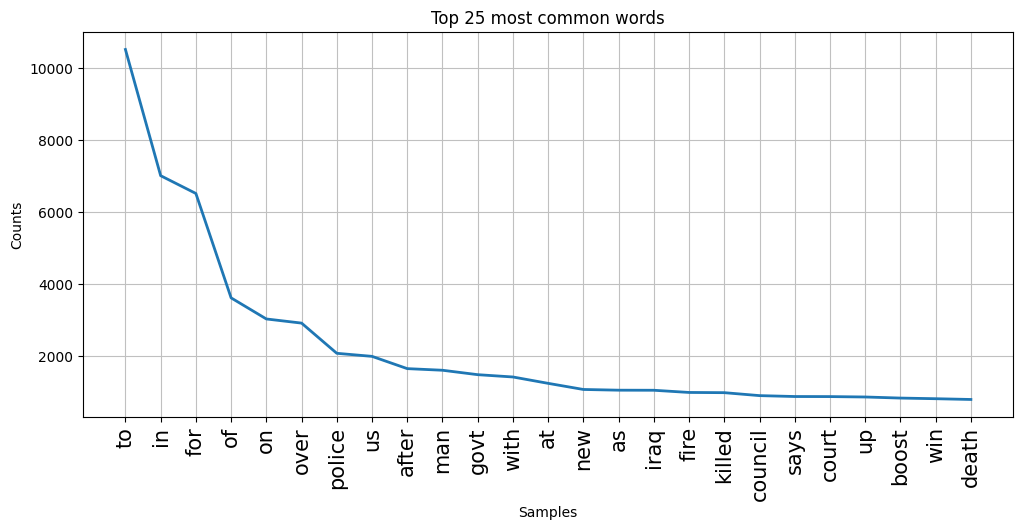

In [11]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [12]:
#plot for cleaned tweets                                                      
all_words = []
for t in data['cleaned_headline_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['act', 'fire', 'witness', 'must', 'be', 'aware', 'of', 'defamation', 'air', 'nz', 'staff', 'in', 'aust', 'strike', 'for', 'pay', 'rise', 'air', 'nz', 'strike', 'to', 'affect', 'australian', 'traveller', 'ambitious', 'olsson', 'win', 'triple', 'jump', 'antic', 'delighted', 'with', 'record', 'breaking', 'barca', 'aust', 'address', 'un', 'security', 'council', 'over', 'iraq', 'australia', 'is', 'locked', 'into', 'war', 'timetable', 'opp', 'barca']


In [13]:
len(set(all_words)) # this is the number of unique words in the list

16849

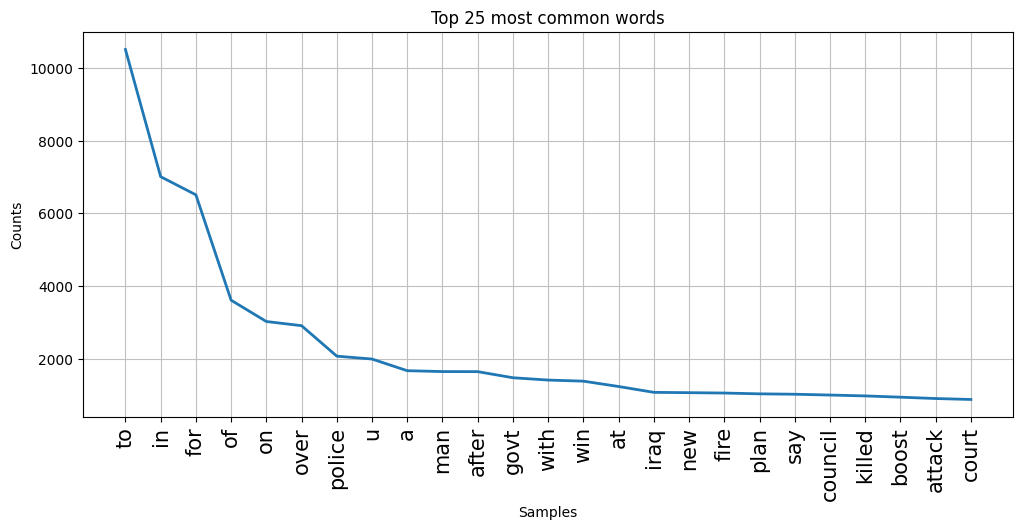

In [14]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [15]:
#after applying stop words
def headline_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [16]:
cleaned_headline = list(data['headline_text'].apply(headline_cleaner_with_stopwords))
print(cleaned_headline[:10])

['act witness aware defamation ', 'air staff aust strike pay rise ', 'air strike affect australian traveller ', 'ambitious olsson win triple jump ', 'antic delighted record breaking barca ', 'aust address security council iraq ', 'australia locked war timetable opp ', 'barca record robson celebrates birthday ', 'big hope launceston cycling championship ', 'big plan boost paroo water supply ']


In [17]:

data['cleaned_headline_with_SW'] = cleaned_headline
data.head()

,headline_text,senti_label,cleaned_headline_w/o_SW,cleaned_headline_with_SW
0,act fire witnesses must be aware of defamation,0,act fire witness must be aware of defamation,act witness aware defamation
1,air nz staff in aust strike for pay rise,0,air nz staff in aust strike for pay rise,air staff aust strike pay rise
2,air nz strike to affect australian travellers,0,air nz strike to affect australian traveller,air strike affect australian traveller
3,ambitious olsson wins triple jump,1,ambitious olsson win triple jump,ambitious olsson win triple jump
4,antic delighted with record breaking barca,1,antic delighted with record breaking barca,antic delighted record breaking barca


['act', 'witness', 'aware', 'defamation', 'air', 'staff', 'aust', 'strike', 'pay', 'rise', 'air', 'strike', 'affect', 'australian', 'traveller', 'ambitious', 'olsson', 'win', 'triple', 'jump', 'antic', 'delighted', 'record', 'breaking', 'barca', 'aust', 'address', 'security', 'council', 'iraq', 'australia', 'locked', 'war', 'timetable', 'opp', 'barca', 'record', 'robson', 'celebrates', 'birthday', 'big', 'hope', 'launceston', 'cycling', 'championship', 'big', 'plan', 'boost', 'paroo', 'water']


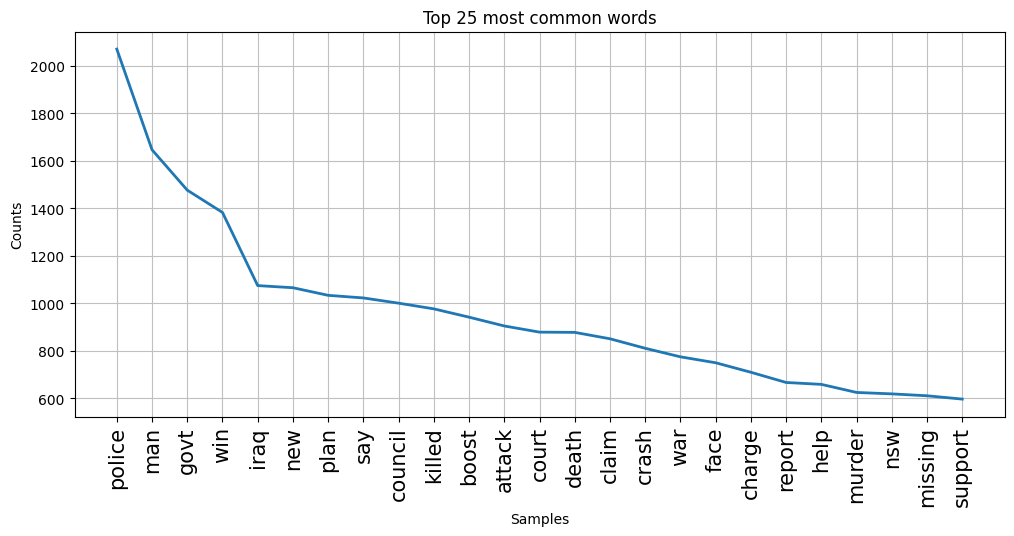

In [18]:
all_words = []
for t in data['cleaned_headline_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [19]:
final_stopwords = list(combined_stopwords)

In [20]:

data.head()

,headline_text,senti_label,cleaned_headline_w/o_SW,cleaned_headline_with_SW
0,act fire witnesses must be aware of defamation,0,act fire witness must be aware of defamation,act witness aware defamation
1,air nz staff in aust strike for pay rise,0,air nz staff in aust strike for pay rise,air staff aust strike pay rise
2,air nz strike to affect australian travellers,0,air nz strike to affect australian traveller,air strike affect australian traveller
3,ambitious olsson wins triple jump,1,ambitious olsson win triple jump,ambitious olsson win triple jump
4,antic delighted with record breaking barca,1,antic delighted with record breaking barca,antic delighted record breaking barca


In [21]:
data.shape

(50000, 4)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_headline_w/o_SW'])

In [23]:

CV_features.shape

(50000, 16826)

In [24]:
CV_features[0]

<1x16826 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [25]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df  
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,16816,16817,16818,16819,16820,16821,16822,16823,16824,16825
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.size/1e6 

841.3

In [27]:
import numpy as np
np.count_nonzero(df)

314742

In [28]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.037411387138951625

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['senti_label'], test_size=0.25, stratify=data['senti_label'], random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score) 

0.9789333333333333
0.95032


In [31]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)  

0.9576
0.94536


In [32]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [33]:
X = CV_features
y = data['senti_label']

In [34]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.9472 0.9501 0.9466 0.9483 0.9469]
94.78 0.13


In [35]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [36]:

results

{'fit_time': array([0.20193505, 0.18855166, 0.24230075, 0.24669337, 0.20440817]),
 'score_time': array([0.00597143, 0.00466061, 0.0050199 , 0.00354433, 0.00630474]),
 'test_score': array([0.9472, 0.9502, 0.9466, 0.9483, 0.9469]),
 'train_score': array([0.9582  , 0.957325, 0.958275, 0.9584  , 0.958275])}

In [37]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.9582   0.957325 0.958275 0.9584   0.958275]
95.81 0.04


In [38]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.9472 0.9502 0.9466 0.9483 0.9469]
94.78 0.13


In [39]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [41]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.95746, 19)

In [42]:

grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [43]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

95.746

In [44]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

97.38550000000001

In [45]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.08799999999999827

In [46]:
grid_results.cv_results_['mean_test_score']

array([0.61148, 0.8742 , 0.90944, 0.92406, 0.93372, 0.9387 , 0.94296,
       0.94626, 0.94784, 0.94962, 0.95102, 0.95222, 0.95318, 0.95408,
       0.95498, 0.95556, 0.95582, 0.95648, 0.957  , 0.95746])

In [47]:

grid_results.cv_results_['mean_train_score']

array([0.61148 , 0.877795, 0.91406 , 0.930425, 0.940465, 0.947215,
       0.951675, 0.955035, 0.958095, 0.960425, 0.962385, 0.96456 ,
       0.966445, 0.967635, 0.96885 , 0.970115, 0.97118 , 0.972155,
       0.973175, 0.973855])

In [48]:
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

94.78 0.13


In [49]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [50]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [51]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

16826

In [52]:
#LR Model without vs with stop_words
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

93.84 0.16


16582

In [53]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

93.42 0.21


3572

In [54]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

78.86 0.15


300

In [55]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=1000)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

87.9 0.19


1000

In [56]:

doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

88.83 0.17
87.81 0.22


1000

In [58]:
#Dimesionality Reduction
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  

90.41 0.19
89.23 0.29


16826

In [59]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [60]:
# Unigrams + Bigrams
X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

94.94 0.05
93.84 0.15


9045

In [61]:

CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=["won't", 'almost', 'becomes', 'five', 'have',
                             "wasn't", 'upon', 'll', 'm', 'between', 'more',
                             'thin', 'none', "you'd", 'ourselves', 'hers',
                             'through', 'shouldn', 'made', 'beforehand',
                             'several', 'ours', 'why', 'most', 'they', 'd',
                             'often', "needn't", 'put', 'throughout', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [62]:
CV.vocabulary_

{'act': 73,
 'witness': 8888,
 'aware': 564,
 'defamation': 2102,
 'air': 186,
 'nz': 5447,
 'staff': 7571,
 'aust': 514,
 'strike': 7687,
 'pay': 5678,
 'rise': 6770,
 'air nz': 190,
 'strike pay': 7698,
 'pay rise': 5689,
 'affect': 128,
 'australian': 525,
 'traveller': 8271,
 'strike affect': 7689,
 'ambitious': 269,
 'win': 8841,
 'triple': 8303,
 'jump': 4266,
 'delighted': 2135,
 'record': 6484,
 'breaking': 958,
 'barca': 652,
 'address': 95,
 'security': 7092,
 'council': 1751,
 'iraq': 4105,
 'security council': 7101,
 'australia': 521,
 'locked': 4658,
 'war': 8652,
 'opp': 5522,
 'celebrates': 1266,
 'birthday': 790,
 'big': 765,
 'hope': 3777,
 'launceston': 4502,
 'cycling': 1984,
 'championship': 1312,
 'plan': 5811,
 'boost': 889,
 'water': 8715,
 'supply': 7798,
 'plan boost': 5814,
 'water supply': 8730,
 'united': 8445,
 'state': 7606,
 'united state': 8448,
 'dismisses': 2296,
 'report': 6622,
 'troop': 8307,
 'british': 985,
 'combat': 1556,
 'daily': 1992,
 'kuwai

In [63]:
import joblib
joblib.__version__

'1.3.2'

In [64]:
# !pip install mglearn
import mglearn

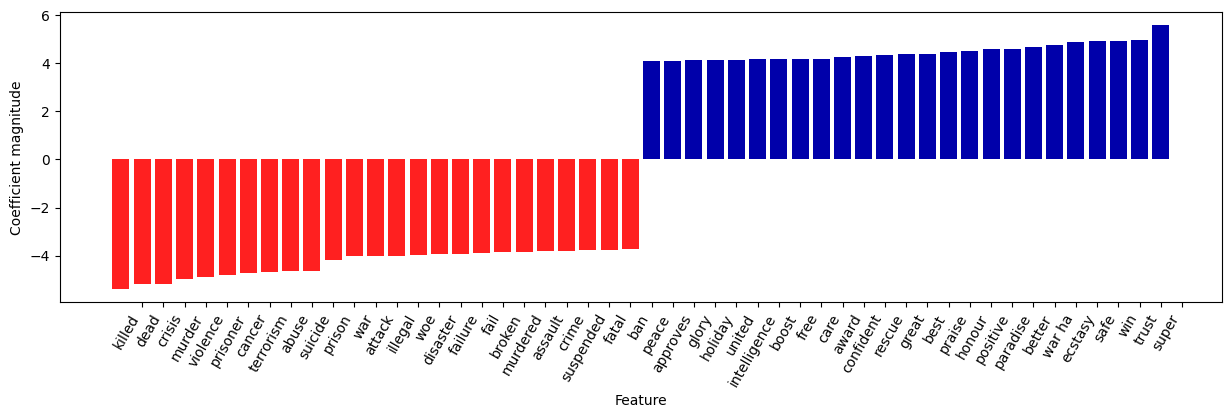

In [65]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

In [66]:
len(coef.ravel()), len(feature_names) 


(9045, 9045)

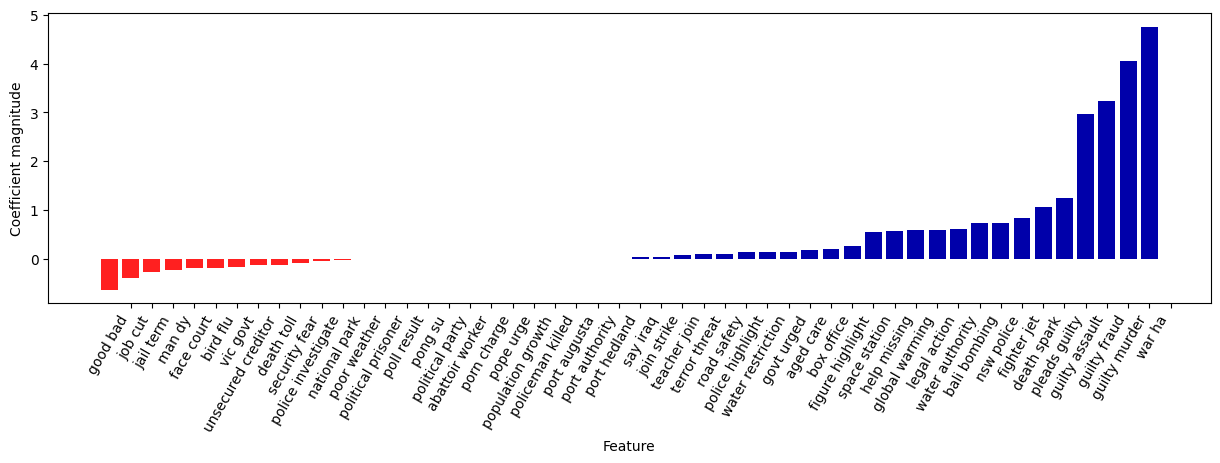

In [67]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


In [68]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_headline_w/o_SW']
y = data['senti_label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

94.94 0.05
93.85 0.15


9369

In [69]:
# Find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = np.array(CV.get_feature_names_out())

# Check dimensions
print("Shape of feature_names:", feature_names.shape)
print("Shape of mask:", mask.shape)

# Fit the model
LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# Visualize only 3-gram features
print("Shape of coef:", coef.shape)

# Ensure mask matches the dimensions of feature_names
if mask.shape[0] != feature_names.shape[0]:
    mask = mask[:feature_names.shape[0]]

# Visualize coefficients
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


Shape of feature_names: (9369,)
Shape of mask: (9045,)
Shape of coef: (1, 9369)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 9369 but corresponding boolean dimension is 9045

In [ ]:
len(coef.ravel()), len(feature_names)

In [ ]:
data.to_pickle("headline_cleaned.pkl")